In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime

In [2]:
train =  pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
hist_trans = pd.read_csv('historical_transactions.csv')

In [4]:
new_merchants = pd.read_csv('new_merchant_transactions.csv')

In [5]:
from featexp import get_univariate_plots
import chartify

Loading BokehJS ...

In [18]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [20]:
train.isnull().values.any() # Dataframe contains no null values, neat! 

False

In [105]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [22]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null datetime64[ns]
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 9.2+ MB


In [6]:
for df in [train, test]:
    df['first_active_month'] = pd.to_datetime(df['first_active_month'])
    df['year'] = df['first_active_month'].dt.year
    df['month'] = df['first_active_month'].dt.month
    df['elapsed_time'] = (datetime.date(2018, 2, 1) - df['first_active_month'].dt.date).dt.days

**Converting the first active month column into datetime format, and seperating the year and month into seperate columns so that we can inspect if theres any significance to month a user began**

In [109]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,year,month,elapsed_time
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,2017,6,245
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,2017,1,396
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,2016,8,549
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,2017,9,153
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,2017,11,92


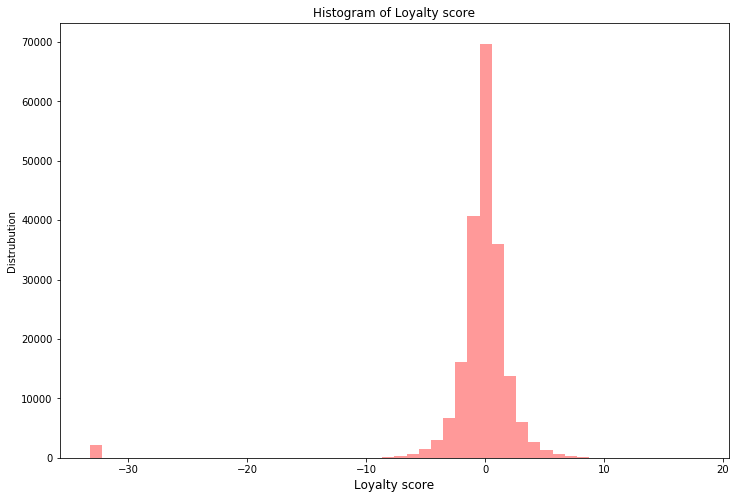

In [9]:
plt.figure(figsize=(12,8))
sns.distplot(train.target.values, bins=50, kde=False, color="red")
plt.title("Histogram of Loyalty score")
plt.xlabel('Loyalty score', fontsize=12)
plt.ylabel('Distrubution')
plt.show()

Why is there a spike in target values at -33 and no where else. Perhaps there is a reason for this. But for model prediction these values maybe should be excluded

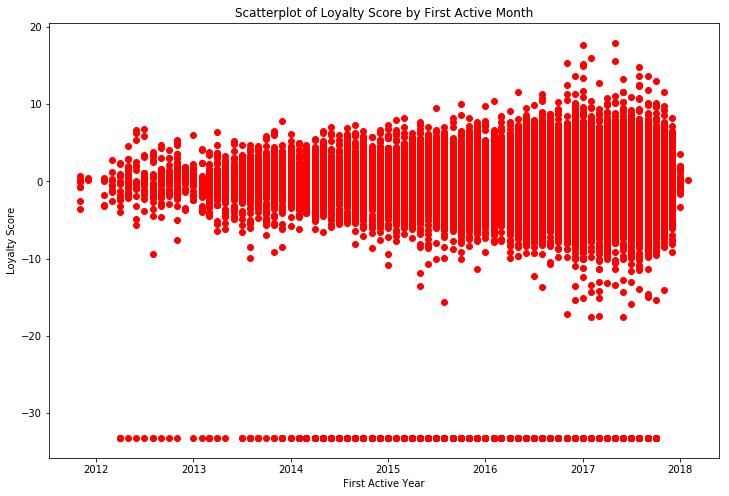

In [15]:
plt.figure(figsize=(12,8))
plt.plot_date(data=train, x='first_active_month', y='target', color= 'red')
plt.title('Scatterplot of Loyalty Score by First Active Month')
plt.xlabel('First Active Year')
plt.ylabel('Loyalty Score')
plt.show()

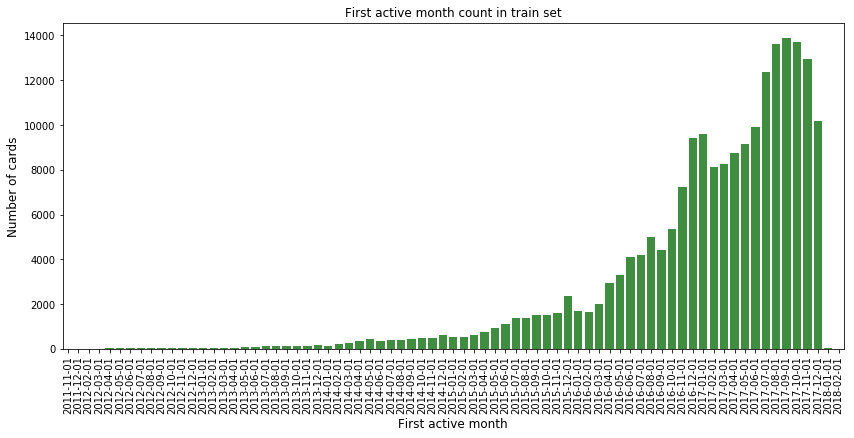

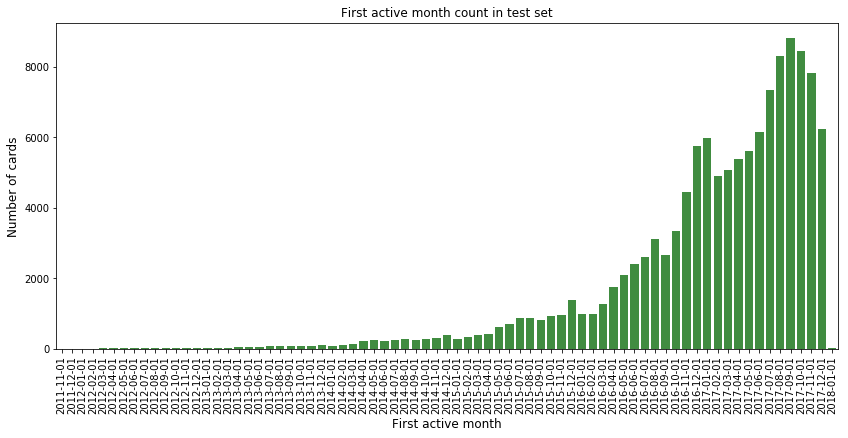

In [16]:
cnt_srs = train['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in train set")
plt.show()

cnt_srs = test['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in test set")
plt.show()

<h1><center>The Distrubution Between the two sets appear similar</center></h1>

In [46]:
hist_trans.head() #Contains information about the cusotmer transaction

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [52]:
new_merchants.head() 
# contains the transactions at new merchants (merchant_ids that this particular card_id has not yet visited) 
# over a period of two months.

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


**<center>Column Descriptions</center><br>**

card_id - Card identifier<br>

month_lag - month lag to reference date<br>

purchase_date - Purchase date<br>

authorized_flag - 'Y' if approved, 'N' if denied<br>

category_3 - anonymized category<br>

installments - number of installments of purchase<br>

category_1 - anonymized category<br>

merchant_category_id - Merchant category identifier (anonymized )<br>

subsector_id - Merchant category group identifier (anonymized )<br>

merchant_id - Merchant identifier (anonymized)<br>

purchase_amount - Normalized purchase amount<br>

city_id - City identifier (anonymized )<br>

state_id - State identifier (anonymized )<br>

category_2 - anonymized category<br>


In [23]:
hist_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int64
category_1              object
installments            int64
category_3              object
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           object
category_2              float64
state_id                int64
subsector_id            int64
dtypes: float64(2), int64(6), object(6)
memory usage: 3.0+ GB


In [24]:
new_merchants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int64
category_1              object
installments            int64
category_3              object
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           object
category_2              float64
state_id                int64
subsector_id            int64
dtypes: float64(2), int64(6), object(6)
memory usage: 209.7+ MB


In [27]:
hist_trans['authorized_flag'] = hist_trans['authorized_flag'].map({'Y':1, 'N':0})
hist_trans['category_1'] = hist_trans['category_1'].map({'Y':1, 'N':0})
hist_trans['category_3'] = hist_trans['category_3'].map({'A':1, 'B':2, 'C':3})
hist_trans = hist_trans.dropna()

In [28]:
new_merchants['authorized_flag'] = new_merchants['authorized_flag'].map({'Y':1, 'N':0})
new_merchants['category_1'] = new_merchants['category_1'].map({'Y':1, 'N':0})
new_merchants['category_3'] = new_merchants['category_3'].map({'A':1, 'B':2, 'C':3})
new_merchants = new_merchants.dropna()

In [29]:
hist_and_new = [hist_trans, new_merchants] 
Transactions = pd.concat(hist_and_new, keys=['Not_new', 'New_Merchant'])

In [30]:
def aggregate_historical_transactions(history):
    
    history.loc[:, 'purchase_date'] = pd.DatetimeIndex(history['purchase_date']).\
                                      astype(np.int64) * 1e-9
    
    agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'city_id': ['nunique'],
        'purchase_amount': ['sum', 'median', 'max', 'min', 'std'],
        'installments': ['sum', 'median', 'max', 'min', 'std'],
        'purchase_date': [np.ptp],
        'month_lag': ['min', 'max'],
        'category_1': ['sum', 'mean'],
        'category_2': ['sum', 'mean'],
        'category_3': ['sum', 'mean']

        }
    
    agg_history = history.groupby(['card_id']).agg(agg_func)
    agg_history.columns = ['hist_' + '_'.join(col).strip() 
                           for col in agg_history.columns.values]
    agg_history.reset_index(inplace=True)
    
    df = (history.groupby('card_id')
          .size()
          .reset_index(name='hist_transactions_count'))
    
    agg_history = pd.merge(df, agg_history, on='card_id', how='left')
    
    return agg_history

In [31]:
grouped_trans = aggregate_historical_transactions(Transactions)

In [32]:
new_train = pd.merge(train, grouped_trans, on='card_id', how='left')
new_test = pd.merge(test, grouped_trans, on='card_id', how='left')

In [33]:
new_train = new_train.dropna()
new_test = new_test.dropna()

In [54]:
valid_mask = new_train.elapsed_time < 100

valid_mask.value_counts()

False    175003
True      22612
Name: elapsed_time, dtype: int64

In [57]:
valid = new_train[valid_mask]

valid.shape

(22612, 33)

In [58]:
train2_mask = new_train.elapsed_time >= 100
train2 = new_train[train2_mask]

train2.shape

(175003, 33)

**Valid, will act as our validation set. We are going to test if many of the feature trends on the loyalty score remain constant between the training set, and the validation set, which is all the users that have been active for less than 100 days. Train2 does not contain the values in valid**

In [28]:
new_train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,year,month,elapsed_time,hist_transactions_count_x,...,hist_installments_std_y,hist_purchase_date_ptp_y,hist_month_lag_min_y,hist_month_lag_max_y,hist_category_1_sum_y,hist_category_1_mean_y,hist_category_2_sum_y,hist_category_2_mean_y,hist_category_3_sum_y,hist_category_3_mean_y
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,2017,6,245,254.0,...,0.119513,1.525001e+09,-8,2,0,0,289.0,1.043321,281.0,1.014440
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,2017,1,396,317.0,...,1.377200,1.522393e+09,-12,2,0,0,323.0,1.000000,705.0,2.182663
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,2016,8,549,43.0,...,0.000000,1.524937e+09,-13,2,0,0,204.0,4.636364,44.0,1.000000
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,2017,9,153,63.0,...,0.121268,1.523949e+09,-5,2,0,0,236.0,3.470588,137.0,2.014706
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,2017,11,92,117.0,...,0.000000,1.524941e+09,-3,2,0,0,558.0,3.720000,300.0,2.000000


In [29]:
new_train.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target', 'year', 'month', 'elapsed_time', 'hist_transactions_count_x',
       'hist_authorized_flag_sum_x', 'hist_authorized_flag_mean_x',
       'hist_merchant_id_nunique_x', 'hist_city_id_nunique_x',
       'hist_purchase_amount_sum_x', 'hist_purchase_amount_median_x',
       'hist_purchase_amount_max_x', 'hist_purchase_amount_min_x',
       'hist_purchase_amount_std_x', 'hist_installments_sum_x',
       'hist_installments_median_x', 'hist_installments_max_x',
       'hist_installments_min_x', 'hist_installments_std_x',
       'hist_purchase_date_ptp_x', 'hist_month_lag_min_x',
       'hist_month_lag_max_x', 'hist_category_1_sum_x',
       'hist_category_1_mean_x', 'hist_category_2_sum_x',
       'hist_category_2_mean_x', 'hist_category_3_sum_x',
       'hist_category_3_mean_x', 'hist_transactions_count_y',
       'hist_authorized_flag_sum_y', 'hist_authorized_flag_mean_y',
       'hist_merchant_id

                                         Plots for feature_1                                          
                                           Train data plots                                           


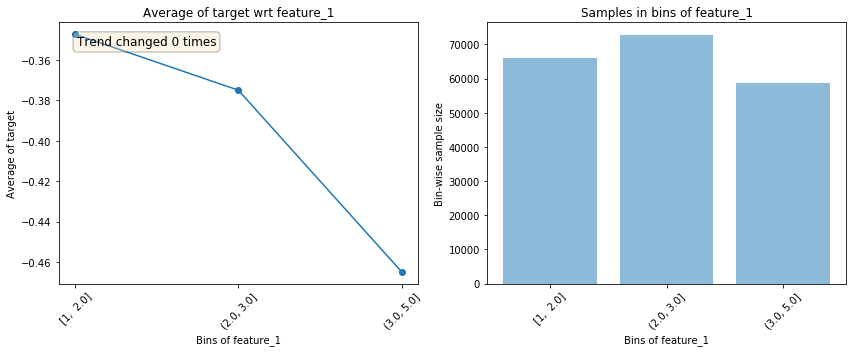

                                           Test data plots                                            


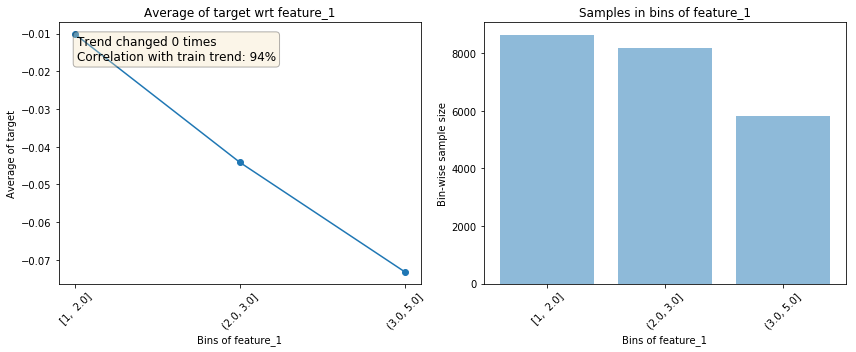

--------------------------------------------------------------------------------------------------------------


                                         Plots for feature_2                                          
                                           Train data plots                                           


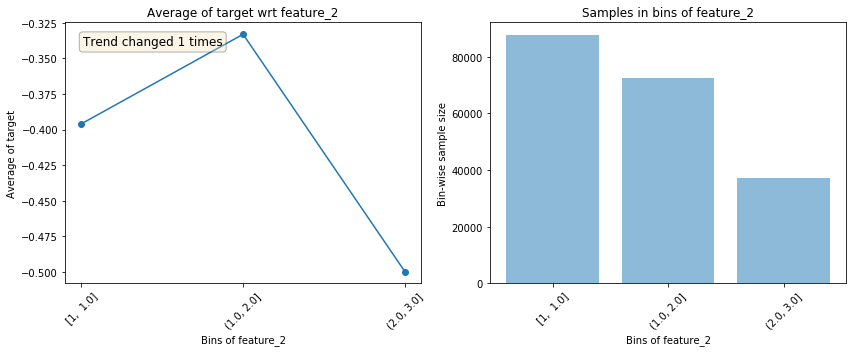

                                           Test data plots                                            


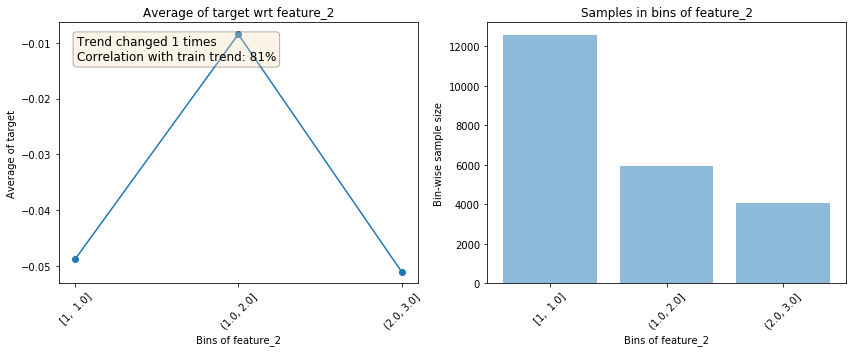

--------------------------------------------------------------------------------------------------------------


                                         Plots for feature_3                                          
                                           Train data plots                                           


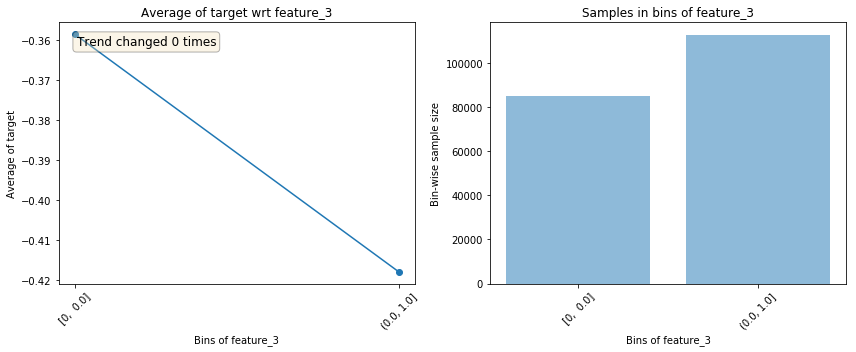

                                           Test data plots                                            


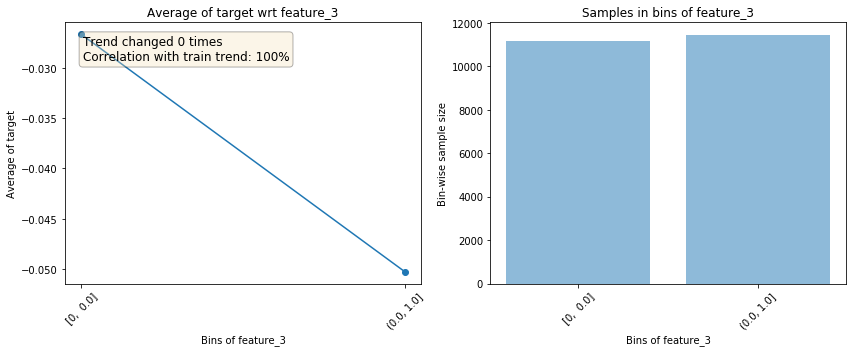

--------------------------------------------------------------------------------------------------------------


                                            Plots for year                                            
                                           Train data plots                                           


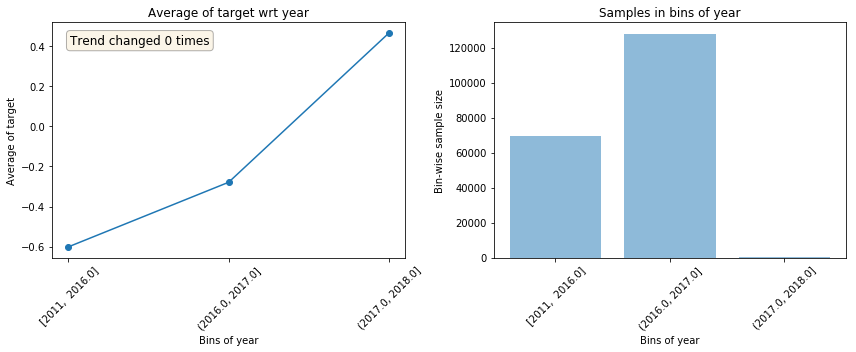

                                           Test data plots                                            


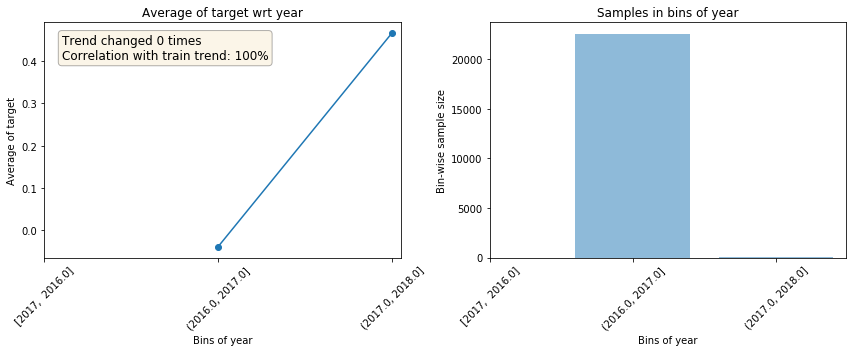

--------------------------------------------------------------------------------------------------------------


                                           Plots for month                                            
                                           Train data plots                                           


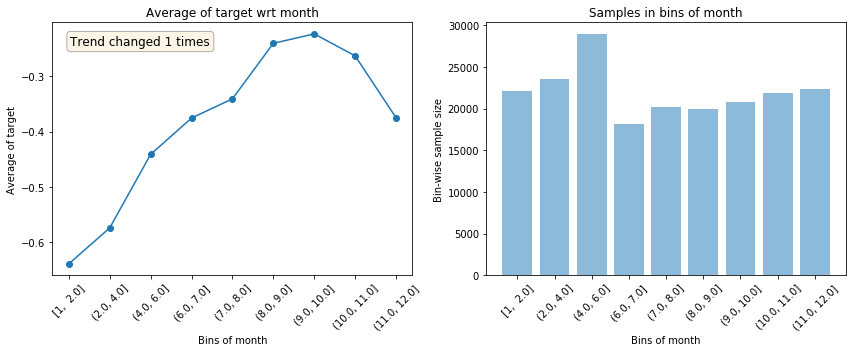

                                           Test data plots                                            


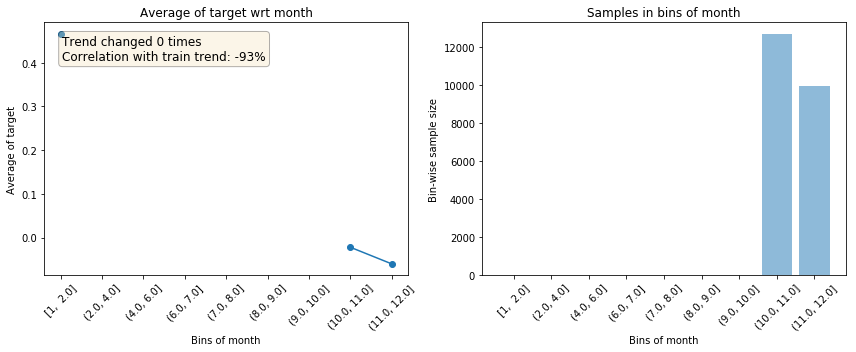

--------------------------------------------------------------------------------------------------------------


                                        Plots for elapsed_time                                        
Only one bin created for elapsed_time. Correlation can't be calculated
                                           Train data plots                                           


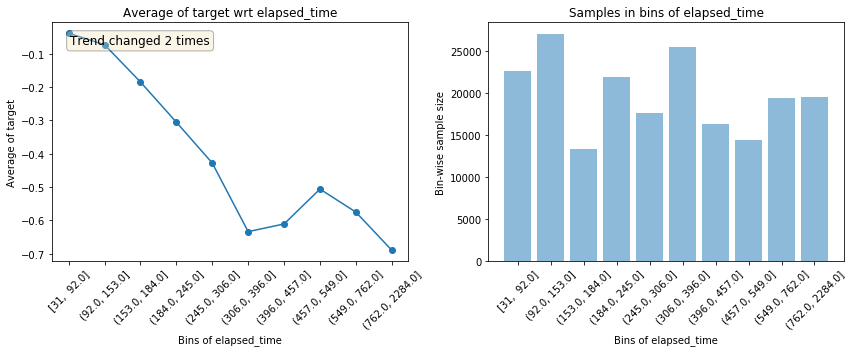

                                           Test data plots                                            


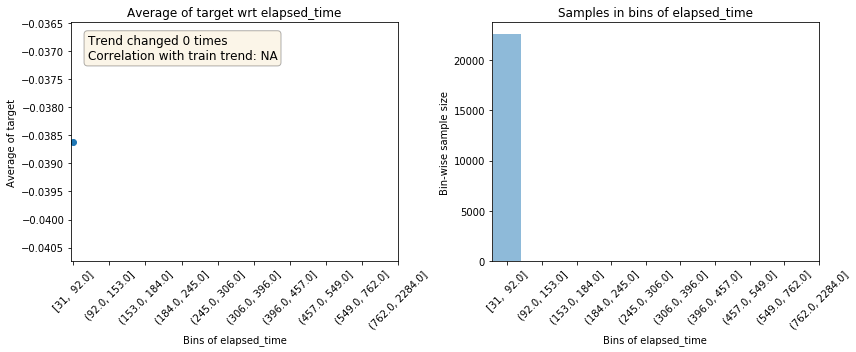

--------------------------------------------------------------------------------------------------------------




KeyError: 'hist_transactions_count_x'

In [60]:
get_univariate_plots(data=new_train, target_col='target', data_test=valid, features_list=[
                         
       'feature_1', 'feature_2', 'feature_3', 'year', 'month', 'elapsed_time', 'hist_transactions_count_x',
       'hist_authorized_flag_sum_x', 'hist_authorized_flag_mean_x',
       'hist_merchant_id_nunique_x', 'hist_city_id_nunique_x',
       'hist_purchase_amount_sum_x', 'hist_purchase_amount_median_x',
       'hist_purchase_amount_max_x', 'hist_purchase_amount_min_x',
       'hist_purchase_amount_std_x', 'hist_installments_sum_x',
       'hist_installments_median_x', 'hist_installments_max_x',
       'hist_installments_min_x', 'hist_installments_std_x',
       'hist_purchase_date_ptp_x', 'hist_month_lag_min_x',
       'hist_month_lag_max_x', 'hist_category_1_sum_x',
       'hist_category_1_mean_x', 'hist_category_2_sum_x',
       'hist_category_2_mean_x', 'hist_category_3_sum_x',
       'hist_category_3_mean_x', 'hist_transactions_count_y',
       'hist_authorized_flag_sum_y', 'hist_authorized_flag_mean_y',
       'hist_merchant_id_nunique_y', 'hist_city_id_nunique_y',
       'hist_purchase_amount_sum_y', 'hist_purchase_amount_median_y',
       'hist_purchase_amount_max_y', 'hist_purchase_amount_min_y',
       'hist_purchase_amount_std_y', 'hist_installments_sum_y',
       'hist_installments_median_y', 'hist_installments_max_y',
       'hist_installments_min_y', 'hist_installments_std_y',
       'hist_purchase_date_ptp_y', 'hist_month_lag_min_y',
       'hist_month_lag_max_y', 'hist_category_1_sum_y',
       'hist_category_1_mean_y', 'hist_category_2_sum_y',
       'hist_category_2_mean_y', 'hist_category_3_sum_y',
       'hist_category_3_mean_y'
                         
                     ], bins=10)